# Simple illustrations of Bayes' theorem

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1D case

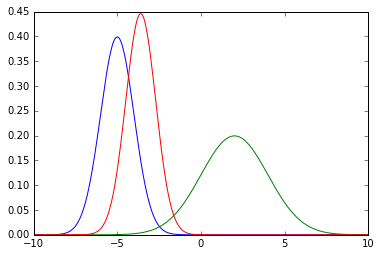

In [5]:
def gauss1d(x,mu,sig):
    xout = -0.5*(x-mu)*(x-mu)/(sig*sig)
    xout = np.exp(xout)
    return xout

xl, xr, dx = -10., 10., 0.05
xaxe = np.arange(xl, xr, dx)
mu1, sig1 = -5.,1.
mu2, sig2 = 2.,2.

p1, p2 = gauss1d(xaxe, mu1, sig1), gauss1d(xaxe, mu2, sig2)
p1/=np.sum(p1*dx)    # Normalize
p2/=np.sum(p2*dx)

p1p2=p1*p2
p1p2/=np.sum(p1p2*dx)

plt.plot(xaxe,p1)
plt.plot(xaxe,p2)
plt.plot(xaxe,p1p2)

In [ ]:
print x1

## 2D case

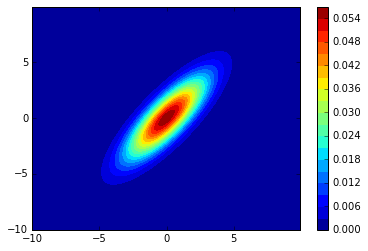

In [72]:
def gauss2d(x,y,mu,covmat):
    nx, ny = len(x), len(y)
    invcovmat = np.linalg.inv(covmat)
    xout = np.empty((nx,ny))
    for iy in range(ny):
        for ix in range(nx):
            xxx = np.array([x[ix], y[iy]]) - mu
            xout[ix,iy] = -0.5*np.dot( np.dot(invcovmat, xxx), xxx )
    xout = np.exp(xout)
    return xout

xl, xr, dx = -10., 10., 0.05
xaxe = np.arange(xl, xr, dx)
yl, yr, dy = -10., 10., 0.05
yaxe = np.arange(yl, yr, dy)
X, Y = np.meshgrid(xaxe, yaxe)
#print X, Y

# Prior distribution, 2D
mu = np.array([0., 0.])
covmat=np.array([6.,4.,4.,4.]).reshape((2,2))

p_prior = gauss2d(xaxe, yaxe, mu, covmat)
p_prior/= np.sum(p_prior*dx*dy)
plt.contourf(X,Y,p_prior,20)
plt.colorbar()

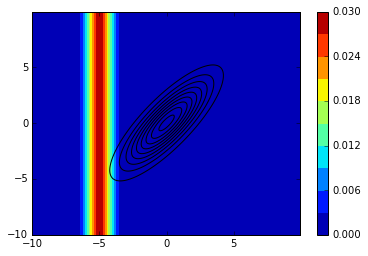

In [88]:
def gauss1din2d(x,y,mu,sig):
    nx, ny = len(x), len(y)
    invcovmat = np.linalg.inv(covmat)
    xout = np.empty((nx,ny))
    for iy in range(ny):
        for ix in range(nx):
            xxx = y[iy] - mu
            xout[ix,iy] = -0.5*xxx*xxx/(sig*sig)
    xout = np.exp(xout)
    return xout

mu2, sig2 = -5.,0.7
p_obs = p12 = gauss1din2d(xaxe, yaxe, mu2, sig2)
p_obs /= np.sum(p_obs*dx*dy)
plt.contourf(X,Y,p_obs,10)
plt.colorbar()
plt.contour(X,Y,p_prior,10, colors='k')

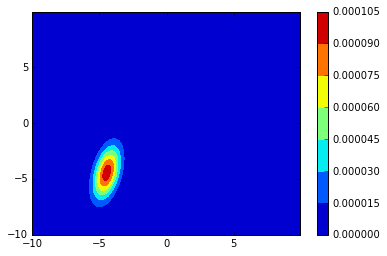

In [70]:
p_posterior = p_prior * p_obs
p_obs /= np.sum(p_posterior*dx*dy)
cs=plt.contourf(X,Y,p_posterior)
plt.colorbar()